In [1]:
import numpy as np
import scipy . optimize as opt
import math
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from scipy.io import loadmat
%matplotlib inline

# Visualizacion de datos

In [2]:
data1 = loadmat(".\p3\ex3data1.mat") 

In [3]:
y = data1['y']
X = data1['X']

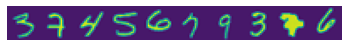

In [15]:
sample = np.random.choice(X.shape[0],10)
plt.imshow(X[sample,:].reshape(-1,20).T)
plt.axis('off')
plt.savefig('randomnums.png')

# Clasificacion 1vAll

In [4]:
def sigmoide(z):
    """
    Devuelve la función sigmoide dado un valor
    Parámetros:
    z    -- numero, array o matriz
    """
    return 1/(1 + np.exp(-z))

def coste_regularizado(thetas,X,Y,lambda_valor):
    """
    Devuelve el valor de la función de coste para un caso de regresión multivariable
    Parámetros:
    thetas     -- valores de los parámetros de ajuste de la función
    X          -- valores de las variables
    Y          -- valores de las etiquetas
    """
    H = sigmoide(np.matmul(X, np.transpose(thetas)))
    sumatorio_reg = np.sum(thetas[1:]**2)
    coste = (- 1 / (len(X))) * np.sum(Y * np.log(H) + (1 - Y) * np.log(1 - H + 1e-6)) + (lambda_valor * sumatorio_reg/ 2*len(X))
    return coste
   
def gradiente_regularizado(thetas,X,Y,lambda_valor):
    """
    Devuelve el valor de los parámetros de ajuste 
    Parámetros:
    thetas     -- valores de los parámetros de ajuste de la función
    X          -- valores de las variables
    Y          -- valores de las etiquetas
    """
    trans = np.transpose(X)
    matriz1 = sigmoide(np.matmul(X,thetas))
    valores_thetas = (1 / len(X)) * (np.matmul(trans,(matriz1-Y)))
    valores_thetas_regularizados = np.concatenate([[valores_thetas[0]], valores_thetas[1:] * lambda_valor/len(X)])
    return valores_thetas

In [25]:
def oneVsAll(X, y, num_etiquetas, reg):
    """
    oneVsAll entrena por regresión log. varios clasificadores y devuelve el resultado en una matriz, donde 
    la fila i-ésima corresponde al clasificador de la etiqueta i-ésima
    Parámetros:
    X             -- matriz de datos
    y             -- vector de clasificación de los datos
    num_etiquetas -- número de etiquetas en las que clasificar los datos
    reg           -- término de regularización
    """
    X1 = np.hstack([np.ones([X.shape[0],1]),X])
    thetas = np.zeros(X1.shape[1])
    mat_1vA = np.empty([num_etiquetas,X.shape[1]+1])
    flattened_y = np.ravel(y)
    etiquetas = np.unique(y)
    for i in np.arange(num_etiquetas):
        ys = (flattened_y == etiquetas[i]) * 1
        result = opt.fmin_tnc(func=coste_regularizado, x0=thetas, fprime=gradiente_regularizado, args=(X1, ys, reg))
        theta_opt = result[0]
        mat_1vA[i] = theta_opt
        #np.stack((thetas, var), axis = 0)
    return mat_1vA

In [26]:
matriz_thetas = oneVsAll(X, y, len(np.unique(y)), 0.1)

In [137]:
len(matriz_thetas[0])

401

In [138]:
matriz_thetas.shape[1]

401

In [27]:
matriz_thetas

array([[-5.92117861e-04,  0.00000000e+00,  0.00000000e+00, ...,
        -3.59751196e-09,  3.71188760e-10,  0.00000000e+00],
       [-7.17089356e-04,  0.00000000e+00,  0.00000000e+00, ...,
         5.81253416e-08, -4.96279058e-09,  0.00000000e+00],
       [-6.71697208e-04,  0.00000000e+00,  0.00000000e+00, ...,
        -6.09619041e-09,  3.72062632e-10,  0.00000000e+00],
       ...,
       [-5.60896094e-04,  0.00000000e+00,  0.00000000e+00, ...,
        -5.54041234e-09,  3.43636724e-10,  0.00000000e+00],
       [-6.12167805e-04,  0.00000000e+00,  0.00000000e+00, ...,
        -6.47890506e-09,  4.25007123e-10,  0.00000000e+00],
       [-1.06138865e-03,  0.00000000e+00,  0.00000000e+00, ...,
        -5.60148832e-08,  1.82053072e-09,  0.00000000e+00]])

In [152]:
np.argmax(np.dot(matriz_thetas,np.insert(X[0],0,1)))

9

In [6]:
def precision_1vA(mat_valores, clases, mat_thetas, ejemplos):
    indice = np.random.randint(5000,size=ejemplos)
    res = np.empty(ejemplos)
    clas = np.empty(ejemplos)
    for i, pos in enumerate(indice):
        caso = np.insert(mat_valores[pos],0,1)
        res[i]=np.argmax(np.dot(mat_thetas, caso))
        clas[i]=clases[pos]-1
    preci = sum(res==clas)/ejemplos
    return res, clas, preci

In [32]:
presvA = np.empty(100)
for i in np.arange(100):
    avA,bvA,cvA = precision_1vA(X,y,matriz_thetas, 1000)
    presvA[i] = cvA

In [33]:
presvA

array([0.768, 0.768, 0.759, 0.749, 0.762, 0.758, 0.758, 0.763, 0.752,
       0.771, 0.765, 0.77 , 0.771, 0.774, 0.78 , 0.772, 0.778, 0.768,
       0.749, 0.763, 0.773, 0.762, 0.767, 0.771, 0.769, 0.779, 0.765,
       0.782, 0.773, 0.778, 0.767, 0.752, 0.777, 0.749, 0.755, 0.786,
       0.767, 0.776, 0.763, 0.777, 0.764, 0.774, 0.767, 0.776, 0.782,
       0.776, 0.746, 0.77 , 0.764, 0.766, 0.76 , 0.786, 0.769, 0.77 ,
       0.742, 0.781, 0.798, 0.766, 0.733, 0.765, 0.759, 0.755, 0.782,
       0.777, 0.782, 0.763, 0.763, 0.777, 0.741, 0.768, 0.736, 0.78 ,
       0.763, 0.772, 0.775, 0.746, 0.755, 0.792, 0.776, 0.779, 0.775,
       0.779, 0.761, 0.78 , 0.758, 0.754, 0.749, 0.776, 0.768, 0.765,
       0.755, 0.775, 0.758, 0.766, 0.76 , 0.77 , 0.782, 0.759, 0.767,
       0.759])

In [34]:
sum(presvA)/len(presvA)

0.7669800000000001

In [147]:
h(matriz_thetas,X1[0:20])

ValueError: shapes (401,20) and (10,401) not aligned: 20 (dim 1) != 10 (dim 0)

In [140]:
X1[0:20].shape[0]

20

# Red neuronal

In [7]:
weights = loadmat('.\p3\ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']

In [21]:
theta1[0].shape[0]

401

In [22]:
theta2[0].shape[0]

26

In [39]:
def propagacion_hacia_delante(x,matriz1,matriz2):
    x1 = np.insert(x,0,1)
    z1 = sigmoide(np.dot(matriz1,x1)) 
    a1 = np.insert(z1, 0, 1)
    z2 = sigmoide(np.dot(matriz2,a1))
    return z2

In [27]:
propagacion_hacia_delante(theta1[0].shape[0], theta1, theta2)

[1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


array([2.58418274e-02, 5.44317478e-03, 2.38541768e-03, 1.09405527e-02,
       7.56119543e-02, 2.65605726e-03, 2.68877045e-02, 7.92447442e-05,
       1.87761485e-03, 1.95172459e-03])

In [120]:
def precision_red(mat_valores, clases, mat_theta1, mat_theta2, ejemplos):
    indice = np.random.randint(5000,size=ejemplos)
    res = np.empty(ejemplos)
    clas = np.empty(ejemplos)
    for i, pos in enumerate(indice):
        res[i]=np.argmax(propagacion_hacia_delante(mat_valores[pos],mat_theta1,mat_theta2))
        clas[i]=clases[pos]-1
    preci = sum(res==clas)/ejemplos
    return res, clas, preci

In [121]:
salida_red, valores_reales, precision = precision_red(X,y,theta1,theta2, 80)

In [122]:
salida_red

array([3., 8., 0., 8., 4., 1., 5., 9., 0., 5., 8., 8., 4., 8., 6., 0., 6.,
       8., 1., 5., 6., 8., 5., 3., 1., 3., 6., 4., 5., 4., 4., 9., 4., 0.,
       2., 1., 8., 2., 1., 2., 3., 1., 5., 9., 6., 0., 1., 0., 1., 5., 6.,
       6., 4., 2., 0., 3., 2., 4., 7., 5., 4., 3., 3., 6., 0., 0., 0., 9.,
       5., 3., 5., 1., 2., 2., 5., 4., 0., 8., 2., 3.])

In [123]:
valores_reales

array([3., 8., 0., 8., 4., 1., 5., 9., 0., 5., 8., 2., 4., 8., 6., 0., 6.,
       8., 1., 5., 6., 8., 5., 3., 1., 3., 6., 4., 5., 4., 4., 9., 4., 0.,
       2., 1., 8., 2., 1., 2., 3., 1., 5., 9., 6., 0., 1., 0., 1., 5., 6.,
       6., 4., 2., 0., 3., 2., 4., 7., 5., 4., 3., 3., 6., 0., 0., 0., 9.,
       5., 3., 5., 1., 2., 2., 5., 4., 0., 8., 2., 3.])

In [124]:
precision

0.9875

In [158]:
pres_red = np.empty(50)
for i, pos in enumerate(np.linspace(100,200,num=50)):
    ar,br,cr = precision_red(X,y,theta1,theta2, 80)
    pres_red[i] = cr

In [159]:
pres_red

array([0.975 , 0.975 , 0.975 , 0.9875, 0.9625, 0.9625, 0.9625, 0.9875,
       0.975 , 0.9875, 0.9625, 0.9875, 0.975 , 0.9625, 0.975 , 0.975 ,
       0.9375, 1.    , 0.9625, 1.    , 0.975 , 1.    , 0.9625, 0.9625,
       0.9625, 0.9625, 0.975 , 0.95  , 0.975 , 1.    , 0.925 , 0.975 ,
       0.9625, 0.9875, 0.975 , 0.95  , 0.9625, 0.9625, 0.975 , 0.975 ,
       0.95  , 0.95  , 0.9625, 1.    , 0.9875, 0.975 , 1.    , 0.9875,
       0.9625, 0.9875])

In [160]:
sum(pres_red)/len(pres_red)

0.9725